### Remove scroll from figures

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Extend the size of the Window

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import numpy as np
import glob
from astropy.io import fits
import matplotlib.pylab as plt
import pandas as pd
from sunpy.map import Map
import astropy.units as u
from reproject import reproject_exact, reproject_interp #use reproject_interp if you want it done quicker.
from skimage.transform import resize

### Define colors an colormaps

In [4]:
# Color Axis limits
vmin = -2000
vmax = 2000

# Color definitions
ClrS = (0.74, 0.00, 0.00)
ClrN = (0.20, 0.56, 1.00)

Clr = [(0.00, 0.00, 0.00),
      (0.31, 0.24, 0.00),
      (0.43, 0.16, 0.49),
      (0.32, 0.70, 0.30),
      (0.45, 0.70, 0.90),
      (1.00, 0.82, 0.67)]

# Colormap Definition
current_cmap = plt.cm.get_cmap('hmimag')
# current_cmap = plt.cm.get_cmap('seismic')
current_cmap.set_bad(color='black')

---

## Specify paths and load index match file

In [12]:
source = 'HMI'
source = 'HR-HMI'
prep_path = '/hmi-patches/train/2014/1/10/'
glob.glob(prep_path+'LR4.0_HMI*.npy')

['/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-203409_975.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-081009_938.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-051009_696.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-164609_686.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-221009_945.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-122209_695.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-073409_980.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-161009_825.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-201009_453.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-101009_688.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-073409_689.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-112209_586.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-231009_705.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-075809_574.npy',
 '/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-115809_828.n

In [13]:
files = pd.DataFrame(glob.glob(prep_path+'HR_HMI*.npy'), columns=['hmi_file'])
files['src_file'] = files['hmi_file']
files

hmi_file  \
0      /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
1      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
2      /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
3      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
4      /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
5      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
6      /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
7      /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
8      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
9      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
10     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
11     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
12     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
13     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
14     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
15     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16     /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
17     /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
18     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
19     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
20     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
21     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
22     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
23     /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
24     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
25     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
26     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
27     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
28     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
29     /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
...                                                  ...   
16623  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16624  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
16625  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
16626  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16627  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
16628  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
16629  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16630  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
16631  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16632  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16633  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
16634  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16635  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16636  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
16637  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
16638  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16639  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16640  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16641  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
16642  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16643  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
16644  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
16645  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
16646  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16647  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
16648  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16649  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...   
16650  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   
16651  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...   
16652  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...   

                                                src_file  
0      /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...  
1      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...  
2      /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...  
3      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...  
4      /hmi-patches/train/2014/1

In [20]:
for i in np.arange(0, files.shape[0]):
#     print(files.loc[i,'hmi_file'], files.loc[i,'hmi_file'].split('_'))
    time_hmi = int(files.loc[i,'hmi_file'].split('_')[2].split('-')[1])
#     print(time_hmi)
    tmp = pd.DataFrame(glob.glob(prep_path + source + '*' + files.loc[i,'hmi_file'].split('_')[-1].split('.')[0] + '*.npy'), columns=['src_file'])
    tmp['time'] = tmp['src_file'].map(lambda x: int(x.split('_')[2].split('-')[1])) 
    inx = (np.min(np.abs(time_hmi-tmp['time']))==np.abs(time_hmi-tmp['time'])).to_numpy().nonzero()[0]
    if len(inx)>0:
        files.loc[i,'src_file'] = tmp.loc[inx[0],'src_file']
    else:
        files.loc[i,'src_file'] = ''
    
files

hmi_file src_file
0      /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
1      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
2      /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
3      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
4      /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
5      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
6      /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
7      /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
8      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
9      /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
10     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
11     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
12     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
13     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
14     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
15     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16     /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
17     /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
18     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
19     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
20     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
21     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
22     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
23     /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
24     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
25     /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
26     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
27     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
28     /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
29     /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
...                                                  ...      ...
16623  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16624  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
16625  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
16626  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16627  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
16628  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
16629  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16630  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
16631  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16632  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16633  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
16634  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16635  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16636  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
16637  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
16638  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16639  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16640  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16641  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
16642  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16643  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
16644  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
16645  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
16646  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16647  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
16648  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16649  /hmi-patches/train/2014/1/10/HR_HMI_20140110-2...         
16650  /hmi-patches/train/2014/1/10/HR_HMI_20140110-0...         
16651  /hmi-patches/train/2014/1/10/HR_HMI_20140110-1...         
16652  /hmi-patches/tr

## Print random patch

source:  0.2646484375 (32, 32)
target:  0.005859375 (32, 32)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: No contour levels were found within the data range.


Text(0.99, 0.99, 'Target')

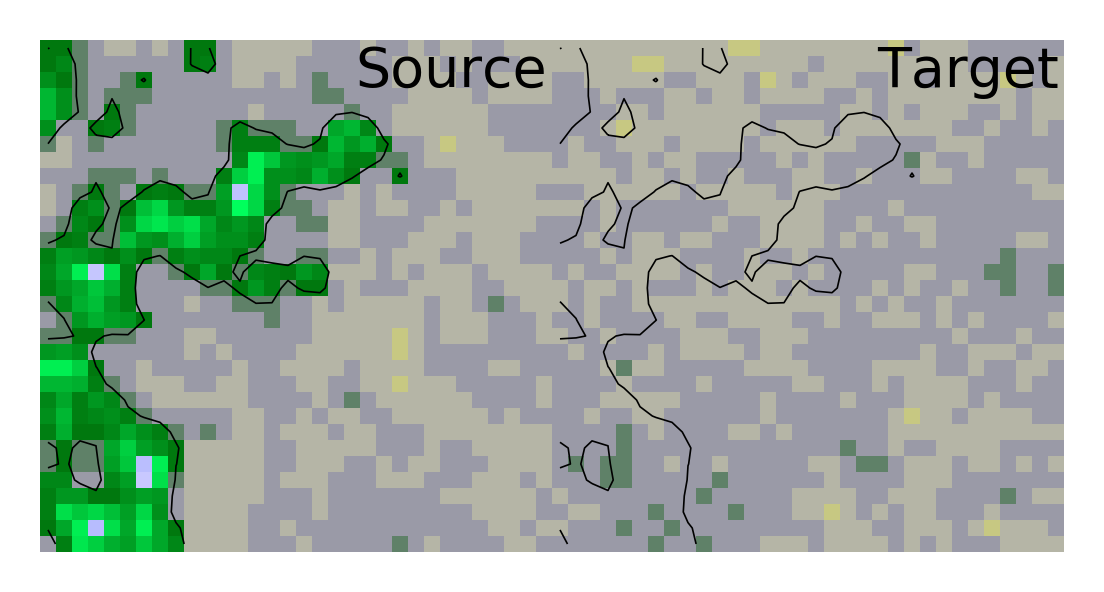

In [31]:
inx = int(np.random.rand(1)*files.shape[0])

target = np.load(files.loc[inx,'hmi_file'])[0,:,:]
source = resize(np.load(files.loc[inx,'hmi_file'].replace('HR_','LR4.0_'))[0,:,:], (target.shape[0], target.shape[1]))

print('source: ', np.sum(source>20)/(source.shape[0]*source.shape[1]), np.load(files.loc[inx,'hmi_file'].replace('HR_','LR4.0_'))[0,:,:].shape)
print('target: ', np.sum(target>20)/(target.shape[0]*target.shape[1]), target.shape)

# contours = np.arange(-300,300,50)
contours = np.array([-20,20])*1.6

# Size definitions
dpi = 400
pxx = 128*4   # Horizontal size of each panel
pxy = 128*4   # Vertical size of each panel

nph = 2     # Number of horizontal panels
npv = 1     # Number of vertical panels 

# Padding
padv  = 0  #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 50  #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in pixels
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in pixels

# Conversion to relative units
ppxx   = pxx/fszh      # Horizontal size of each panel in relative units
ppxy   = pxy/fszv      # Vertical size of each panel in relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszh     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszh    #Horizontal padding between panels in relative units


## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi), dpi = dpi)

# Inferred
ax1 = fig.add_axes([ppadh, ppadv, ppxx, ppxy])
ax1.imshow(source, vmin=vmin, vmax=vmax, cmap = current_cmap, origin='lower')

x, y = np.meshgrid(*[np.arange(v) for v in source.shape])
ax1.contour(x, y, source, contours, colors='k', linestyles='-', linewidths=0.3)

ax1.set_axis_off()
ax1.text(0.99, 0.99, 'Source', horizontalalignment='right', verticalalignment='top', color = 'k', transform=ax1.transAxes)



ax2 = fig.add_axes([ppadh+ppxx, ppadv, ppxx, ppxy])
ax2.imshow(target, vmin=vmin, vmax=vmax, cmap = current_cmap, origin='lower')
ax2.contour(x, y, source, contours, colors='k', linestyles='-', linewidths=0.3)
ax2.contour(x, y, target, contours, colors='b', linestyles='--', linewidths=0.3)



ax2.set_axis_off()
ax2.text(0.99, 0.99, 'Target', horizontalalignment='right', verticalalignment='top', color = 'k', transform=ax2.transAxes)



# ax3 = fig.add_axes([ppadh, ppadv-ppxy, ppxx, ppxy])
# ax3.imshow(mdi_hmi_map.data-MDImap.data, vmin=vmin, vmax=vmax, cmap = current_cmap, origin='lower')
# ax3.set_axis_off()
# ax3.text(0.99, 0.99, 'Difference', horizontalalignment='right', verticalalignment='top', color = 'k', transform=ax3.transAxes)
# ax3.set_xlim([indices[0]-w_width//2, indices[0]+w_width//2])
# ax3.set_ylim([indices[0]-w_height//2, indices[0]+w_height//2])

# # fig.savefig(label + '_FD.png', bbox_inches='tight', dpi = dpi, pad_inches=0)

In [24]:
files.loc[inx,'hmi_file'].replace('HR_','LR4.0_')

'/hmi-patches/train/2014/1/10/LR4.0_HMI_20140110-033409_951.npy'

In [42]:
np.load(files.loc[inx,'src_file'])[0,:,:].shape

(26, 26)

In [44]:
26*32

832

In [32]:
target.shape

(32, 32)